In [250]:
import pandas as pd
from dotenv import load_dotenv, find_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [251]:
load_dotenv(find_dotenv())

True

In [252]:
project_root = os.environ.get("PROJECT_ROOT")
data_dir = os.environ.get("DATA_DIR")
dataset_fullpath = os.path.join(project_root, data_dir, "output")
dataset_fullpath

'/home/tdy245/ResearchProjects/Winter_2024/CMPT-828/A_Implementation/PaCo/data/output'

In [253]:
# save all essential to reports
figures_dir = os.path.join(project_root, 'reports', 'figures')

In [254]:
large_patches_df = pd.read_csv(os.path.join(dataset_fullpath, "large-patches.csv"))
small_patches_df = pd.read_csv(os.path.join(dataset_fullpath, "small-patches.csv")) 

# Implementation on the small_patches dataset

In [255]:
small_patches_df.keys()

Index(['dataset', 'tool', 'buggy', 'patch', 'label'], dtype='object')

In [256]:
small_patches_df['tool'].unique()

array(['ACS', 'Kali', 'SketchFix', 'Cardumen', 'TBar', 'jKali',
       'SequenceR', 'CapGen', 'Nopol', 'AVATAR', 'jGenProg', 'Nopol2015',
       'HDRepair', 'Nopol2017', 'FixMiner', 'Jaid', 'SimFix', 'kPAR',
       'Arja', 'RSRepair', 'SOFix', 'jMutRepair', 'GenProg', 'DynaMoth',
       'HDRepair.patch', 'ACS.patch', 'Nopol2015.patch', 'jGenProg.patch',
       'defects4j-developer'], dtype=object)

In [257]:
def dataset_info(dataset):
    print(f"Total number of patches:  {dataset.shape[0]}")
    print(f"Total number of unique bugs: {len(dataset['dataset'].unique())}")
    print(f"Total number of correct patches: {len(dataset.loc[dataset['label'] == 'correct'])}")
    print(f"Total number of overfitted patches: {len(dataset.loc[dataset['label'] == 'overfitting'])}")
    print(f"Tools used: {dataset['tool'].unique()}\nTotal number of tools: {len(dataset['tool'].unique())}")

In [258]:
dataset_info(small_patches_df)

Total number of patches:  1183
Total number of unique bugs: 356
Total number of correct patches: 535
Total number of overfitted patches: 648
Tools used: ['ACS' 'Kali' 'SketchFix' 'Cardumen' 'TBar' 'jKali' 'SequenceR' 'CapGen'
 'Nopol' 'AVATAR' 'jGenProg' 'Nopol2015' 'HDRepair' 'Nopol2017' 'FixMiner'
 'Jaid' 'SimFix' 'kPAR' 'Arja' 'RSRepair' 'SOFix' 'jMutRepair' 'GenProg'
 'DynaMoth' 'HDRepair.patch' 'ACS.patch' 'Nopol2015.patch'
 'jGenProg.patch' 'defects4j-developer']
Total number of tools: 29


In [259]:
small_df_ = pd.crosstab(small_patches_df["dataset"], small_patches_df["label"])
small_df_.name = "small_patches"

In [260]:
print(f"Has only incorrect patches: {len(small_df_.loc[small_df_['correct'] == 0])} ")
print(f"Has only correct patches: {len(small_df_.loc[small_df_['overfitting'] == 0])} ")
small_df_.head()

Has only incorrect patches: 2 
Has only correct patches: 190 


label,correct,overfitting
dataset,,
Defects4J-Chart-1,3,14
Defects4J-Chart-10,1,0
Defects4J-Chart-11,3,0
Defects4J-Chart-12,2,5
Defects4J-Chart-13,1,15


In [402]:
small_df_.loc[small_df_['overfitting'] == 0]

label,correct,overfitting
dataset,,
Defects4J-Chart-10,1,0
Defects4J-Chart-11,3,0
Defects4J-Chart-16,1,0
Defects4J-Chart-2,1,0
Defects4J-Chart-20,3,0
...,...,...
Defects4J-Time-3,1,0
Defects4J-Time-5,1,0
Defects4J-Time-6,1,0


In [360]:
data.tail()

,Number of patches,Category
707,0,Overfitting
708,0,Overfitting
709,1,Overfitting
710,0,Overfitting
711,0,Overfitting


**Visualization of patch distribution**

In [436]:

def plot_density_univariate(dataset, xlim = (0, 25)):
    # "figures_dir" is a global variable
    plt.figure(figsize=(5, 3))

    data = pd.DataFrame({
        "Number of patches": np.concatenate([dataset["correct"] , dataset["overfitting"] ]),
        "Category": ["Correct" for i in range(len(dataset["correct"]))] + ["Overfitting" for i in range(len(dataset["overfitting"]))]
    })

    sns.kdeplot(
        data=data, x="Number of patches", hue="Category", fill=True,  palette='colorblind', bw_adjust=1,)
    
    plt.xlim(xlim)
    plt.savefig(os.path.join(figures_dir, dataset.name + "_density_univariate.pdf"), format = "pdf", dpi = 300, bbox_inches='tight')
    plt.show()

In [437]:

def plot_density_bivariate(dataset1, dataset2):

    plt.figure(figsize=(5, 3))

    data1 = pd.DataFrame({
        "correct": dataset1["correct"],
        "overfitting": dataset1['overfitting'],         
        "Category": [dataset1.name for i in range(len(dataset1))]
    })

    data2 = pd.DataFrame({
        "correct": dataset2["correct"],
        "overfitting": dataset2['overfitting'],         
        "Category": [dataset2.name for i in range(len(dataset2))]
    })

    long_df = pd.concat([data1, data2], ignore_index=True)
    sns.displot( data=long_df, x="correct", y = "overfitting", hue="Category", fill=True,  palette='colorblind',  kind="kde")
 
    plt.xlim(-2, 100)
    plt.ylim(-2, 100)
    plt.savefig(os.path.join(figures_dir, "dataset_density_bivariate.pdf"), format = "pdf", dpi = 300, bbox_inches='tight')
    plt.show()

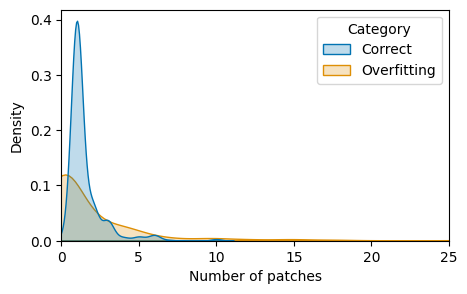

In [438]:
plot_density_univariate(small_df_)

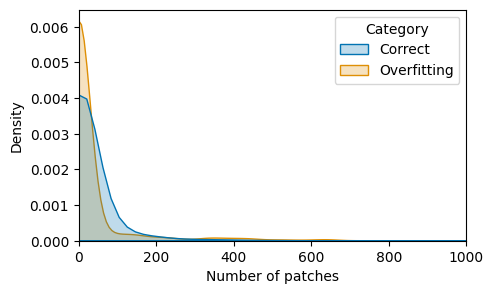

In [439]:
plot_density_univariate(large_df_, (0, 1000))

**Since there is an uneven distribution of data in the dataset. We need to fix the balance or use different kinds of training**

### Data Preprocessing

1. 

In [293]:
small_patches_df.iloc[0]['buggy']

'public final class MathUtils { public static final double EPSILON = 0x1.0p-53; if (n < 0) { throw new IllegalArgumentException("must have n >= 0 for n!"); } return Math.floor(Math.exp(factorialLog(n)) + 0.5); } '

# Implementation on the large_patches dataset

In [440]:
def dataset_info(dataset):
    print(f"Total number of patches:  {dataset.shape[0]}")
    print(f"Total number of unique bugs: {len(dataset['dataset'].unique())}")
    print(f"Total number of correct patches: {len(dataset.loc[dataset['label'] == 'correct'])}")
    print(f"Total number of overfitted patches: {len(dataset.loc[dataset['label'] == 'overfitting'])}")
    print(f"Tools used: {dataset['tool'].unique()}\nTotal number of tools: {len(dataset['tool'].unique())}")

In [441]:
dataset_info(large_patches_df)

Total number of patches:  49694
Total number of unique bugs: 855
Total number of correct patches: 25589
Total number of overfitted patches: 24105
Tools used: ['jKali-DifferentFragPatches' 'GenProg-DifferentFilePatches'
 'NPEfix-DifferentFragPatches' 'Kali' 'RSRepair-DifferentFilePatches'
 'jMutRepair-DifferentFragPatches' 'GenProg-DifferentFragPatches'
 'jGenProg-DifferentFragPatches' 'jKali' 'jKali-DifferentFilePatches'
 'RSRepair-DifferentFragPatches' 'Kali-DifferentFragPatches'
 'Arja-DifferentFilePatches' 'Dynamoth-DifferentFilePatches'
 'Kali-DifferentFilePatches' 'Cardumen-DifferentFragPatches'
 'Dynamoth-DifferentFragPatches' 'jGenProg'
 'Cardumen-DifferentFilePatches' 'NPEFix' 'Nopol-DifferentFilePatches'
 'Arja' 'Arja-DifferentFragPatches' 'RSRepair'
 'NPEfix-DifferentFilePatches' 'Nopol-DifferentFragPatches'
 'jMutRepair-DifferentFilePatches' 'jMutRepair' 'GenProg' 'DynaMoth'
 'Cardumen' 'Nopol' 'Many']
Total number of tools: 33


In [442]:
large_patches_df.iloc[0]['buggy']

' final double ret; final double absX = org.apache.commons.math4.util.FastMath.abs(x); if (absX <= 20.0) { if (x >= 1.0) { '

In [443]:
large_df_ = pd.crosstab(large_patches_df["dataset"], large_patches_df["label"])
large_df_.name = "large_patches"

In [444]:
print(f"Has only incorrect patches: {len(large_df_.loc[large_df_['correct'] == 0])} ")
print(f"Has only correct patches: {len(large_df_.loc[large_df_['overfitting'] == 0])} ")
large_df_.head()

Has only incorrect patches: 233 
Has only correct patches: 607 


label,correct,overfitting
dataset,,
ACRA.acra,28,0
Activiti.Activiti,71,0
Alluxio.alluxio,289,0
AltBeacon.android-beacon-library,8,0
AndroidBootstrap.android-bootstrap,2,0


In [445]:
len(large_df_)

855

In [19]:
large_patches_df["dataset"].unique()

array(['Bugs.jar-math-45', 'Defects4J-Chart-5', 'Defects4J-Math-8',
       'Bears-139', 'Defects4J-Closure-10', 'Bugs.jar-math-24',
       'Defects4J-Closure-13', 'QuixBugs-DEPTH_FIRST_SEARCH-',
       'Bugs.jar-math-33', 'Bugs.jar-math-28', 'Defects4J-Math-20',
       'Bears-126', 'Defects4J-Chart-1', 'Defects4J-Closure-21',
       'Defects4J-Closure-67', 'Defects4J-Lang-7', 'Defects4J-Math-50',
       'Defects4J-Closure-130', 'Defects4J-Closure-59',
       'Defects4J-Math-22', 'Defects4J-Math-31', 'Defects4J-Math-95',
       'Defects4J-Closure-118', 'Bugs.jar-math-105', 'Defects4J-Math-49',
       'Defects4J-Closure-55', 'Defects4J-Closure-22', 'Defects4J-Math-2',
       'Defects4J-Closure-46', 'Defects4J-Math-40',
       'Defects4J-Closure-124', 'Defects4J-Closure-112',
       'Defects4J-Closure-127', 'Defects4J-Closure-117',
       'Defects4J-Math-28', 'Defects4J-Closure-115', 'Defects4J-Math-85',
       'Defects4J-Closure-75', 'Defects4J-Chart-12',
       'Defects4J-Closure-129', 